In [31]:
import os
os.chdir("C:/Users/TTBDONMEZ/Desktop/UDACITY_DATA_SCIENTIST/TheDataScienceProcess")

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_boston_calendar= pd.read_csv('./boston-calendar.csv')

df_seattle_calendar=pd.read_csv('./seattle-calendar.csv')

df_boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [33]:
#dropping nulls, while data understanding I saw that only available ==f has no price, so dropped nulls
boston_price_dates=pd.DataFrame(df_boston_calendar.dropna(subset=['price'],how='any'))

In [34]:
boston_price_dates.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [35]:
#dropping nulls, while data understanding I saw that only available ==f has no price, so dropped nulls
seattle_price_dates=pd.DataFrame(df_seattle_calendar.dropna(subset=['price'],how='any'))

In [36]:
seattle_price_dates.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [37]:
def get_floatPrice(df):
    '''
    INPUT - df - pandas dataframe with the price data type string
           
    OUTPUT -df - pandas dataframe with the price data type float
    '''
    df['price'] = df['price'].map(lambda x: x.replace("$",""))
    
    df['price'] = df['price'].map(lambda x: x.replace(".",""))
    
    df['price'] = df['price'].map(lambda x: x.replace(",",""))
    
    df['price'] = df['price'].apply(lambda x: float(x))
    
    df['price'] = df['price']/100
    
    df=df
    
    return df

In [38]:
get_floatPrice(boston_price_dates)

get_floatPrice(seattle_price_dates)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [10]:
#fixing data type of date
boston_price_dates['date'] = pd.to_datetime(boston_price_dates['date'])

In [11]:
#getting year month
boston_price_dates['YearMonth'] = boston_price_dates['date'].map(lambda x: 100*x.year + x.month)

In [13]:
#dropping unnecessary columns
boston_price_yearmonths=boston_price_dates.drop(['available','date','listing_id'], axis=1)

In [14]:
#grouping by months and calucalting average prices
boston_price_months=pd.DataFrame(boston_price_yearmonths.groupby(['YearMonth'])['price'].mean())

In [15]:
seattle_price_dates['date'] = pd.to_datetime(seattle_price_dates['date'])

In [16]:
seattle_price_dates['YearMonth'] = seattle_price_dates['date'].map(lambda x: 100*x.year + x.month)

In [17]:
seattle_price_yearmonths=seattle_price_dates.drop(['available','date','listing_id'], axis=1)

In [18]:
seattle_price_months=pd.DataFrame(seattle_price_yearmonths.groupby(['YearMonth'])['price'].mean())

In [21]:
boston_price_yearmonths['price'].describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

In [22]:
seattle_price_yearmonths['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [23]:
# Change the price column label to Seattle
seattle_price_months = seattle_price_months.rename(columns={'price':'Seattle'})

# Change the price column label to Boston
boston_price_months = boston_price_months.rename(columns={'price':'Boston'})


In [39]:

#merging two data frames 
comp_price_months = pd.merge(seattle_price_months,
                 boston_price_months,
                 on='YearMonth')

comp_price_months.head()

,Seattle,Boston
YearMonth,,
201609,143.255949,252.677308
201610,137.031939,233.416248
201611,135.688738,202.924416
201612,137.251835,192.601915
201701,136.882590,182.799671


In [25]:
comp_price_months['Diff_Price'] = comp_price_months['Boston'] - comp_price_months['Seattle']
comp_price_months.style.bar(subset=['Diff_Price'], align='mid', color=['#d65f5f', '#5fba7d'])

,Seattle,Boston,Diff_Price
YearMonth,,,
201609,143.255949,252.677308,109.421360
201610,137.031939,233.416248,96.384309
201611,135.688738,202.924416,67.235678
201612,137.251835,192.601915,55.350080
201701,136.882590,182.799671,45.917080


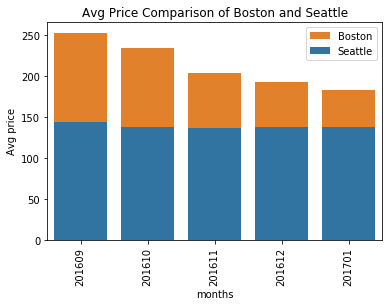

In [42]:
base_color = sns.color_palette()[1] # 1 orange, 0 blue
base_color_2 = sns.color_palette()[0]
sns.barplot(comp_price_months.index.values,comp_price_months.Boston,color = base_color, label='Boston')
sns.barplot(comp_price_months.index.values,comp_price_months.Seattle, color = base_color_2, label='Seattle')
plt.xticks(rotation = 90)
plt.xlabel('months')
plt.ylabel('Avg price')
plt.title('Avg Price Comparison of Boston and Seattle')
plt.legend()